In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
df = pd.read_csv('Brent.csv')
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])
df.set_index('Unnamed: 0', inplace=True)
df.head()


,Brent
Unnamed: 0,
1990-06-05,96.273671
1990-06-06,95.357361
1990-06-07,95.357361
1990-06-08,95.601710
1990-06-11,95.601710


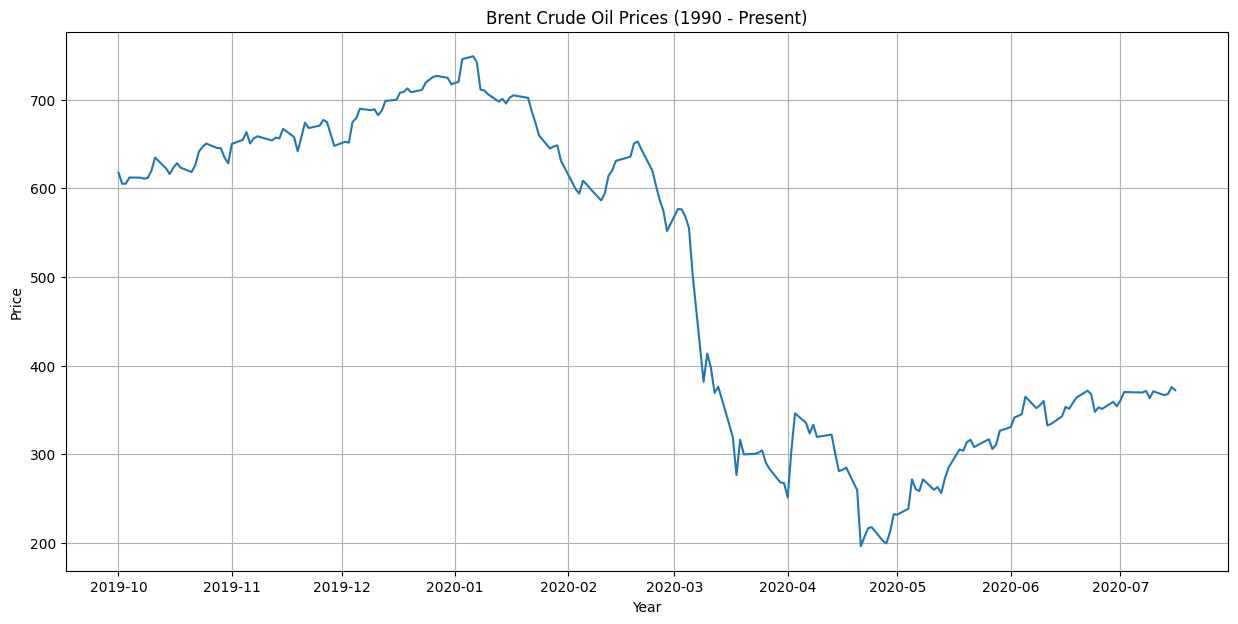

In [117]:
# Plotting the Brent crude oil prices
plt.figure(figsize=(15, 7))
plt.plot(df.index[7300:7500], df['Brent'][7300:7500])
plt.title('Brent Crude Oil Prices (1990 - Present)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# I - Implementing intuitive strategy

In a first part, we are going to implement a simple strategy, where we are going to buy (let say 10 barrel) each time the price increases between day n and day n-1. Yhen we are going to sell 10% of all we have each time the price decreases between day n and day n-1.

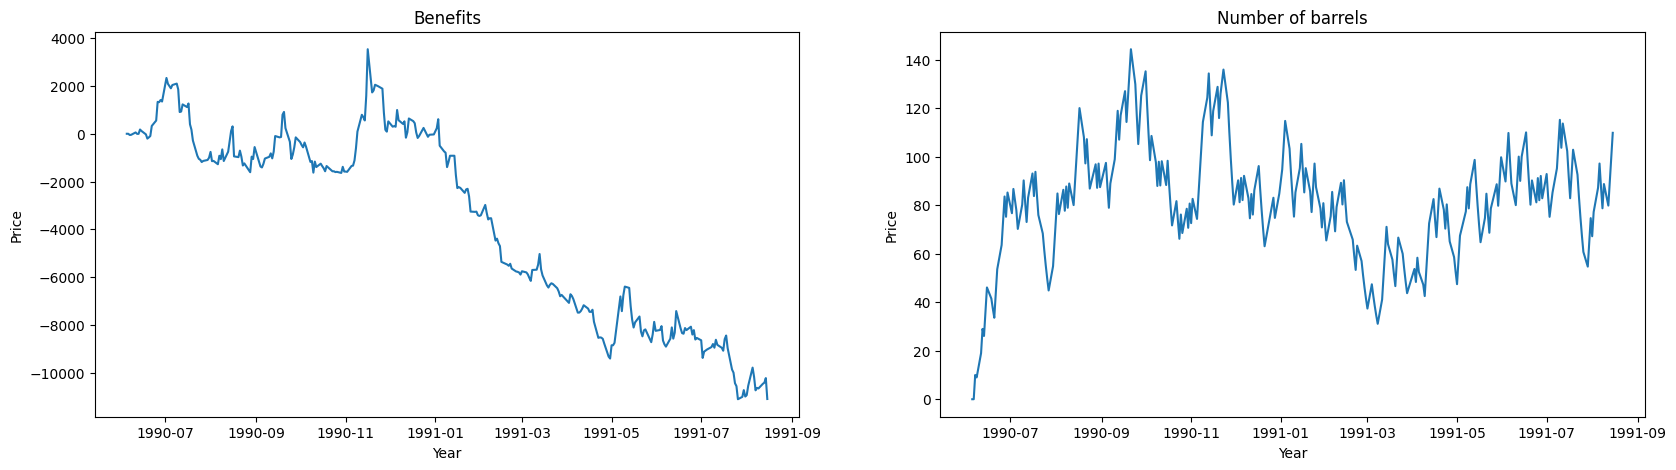

-11110.09516148132


In [113]:
def strat():
    n = 0
    benefits = 0
    B = []
    X = []
    N = []
    prices = df['Brent'].values[1700:2000]
    for i, p in enumerate(prices):
        N.append(n)
        if i>0:
            if prices[i-1]<=p:
                n +=10
                benefits-=10*p
            else:
                k = n/10
                n-= k
                benefits += k*p
        B.append(benefits + n*p)
        X.append(df.index[i])
    plt.figure(figsize=(20, 5))
    plt.subplot(1,2,1)
    plt.plot(X, B)
    plt.title('Benefits')
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.subplot(1,2,2)
    plt.title('Number of barrels')
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.plot(X, N)
    plt.show()
    return benefits + n*p


print(strat())

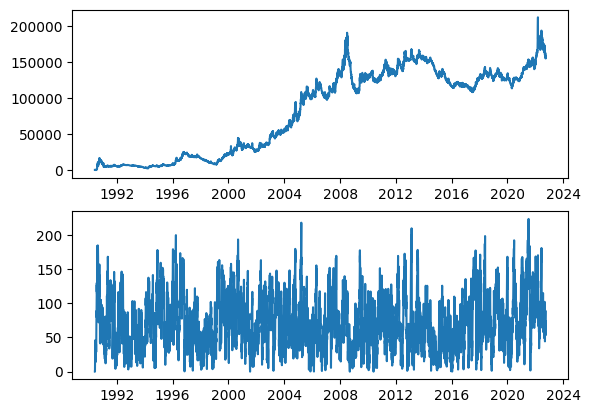

156507.9824627001


In [99]:
def strat():
    n = 0
    benefits = 0
    B = []
    X = []
    N = []
    prices = df['Brent'].values
    l=0
    for i, p in enumerate(prices):
        N.append(n)
        if i>0:
            if prices[i-1]<=p:
                l=0
                n +=10
                benefits-=10*p
            else:
                l+=1
                k = n/10*l
                n-= k
                benefits += k*p
        B.append(benefits + n*p)
        X.append(df.index[i])
    plt.subplot(2,1,1)
    plt.plot(X, B)
    plt.subplot(2,1,2)
    plt.plot(X, N)
    plt.show()
    return benefits + n*p


print(strat())

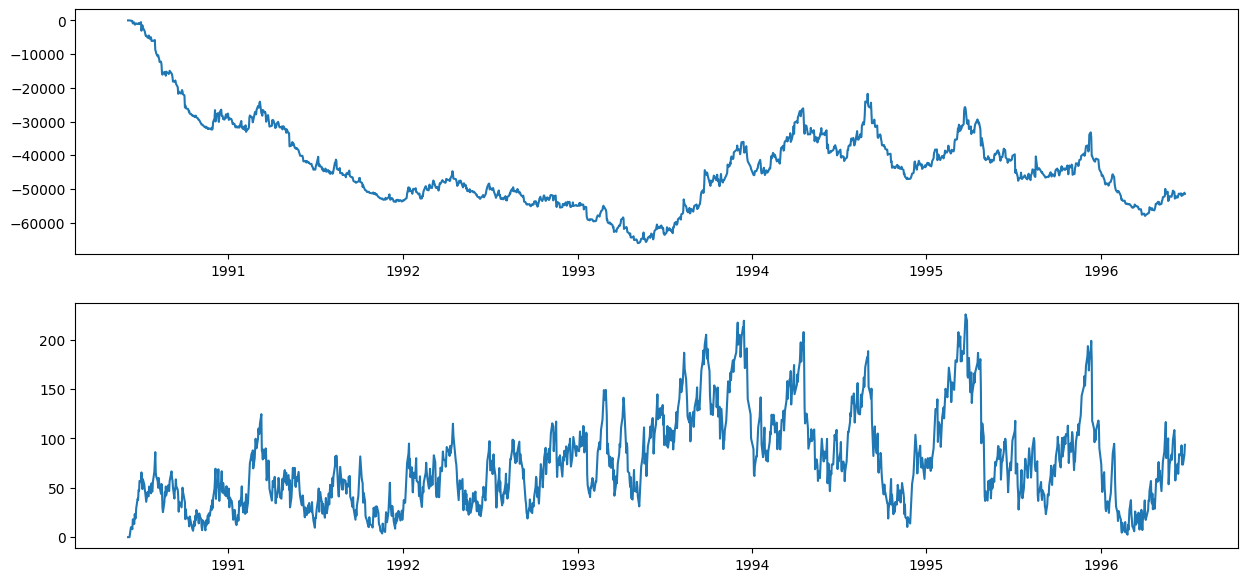

-51450.657636998876


In [105]:
from scipy.special import expit

def strat2():
    prices = df['Brent'].values[6000:7500]
    n = 0
    benefits = 0
    B = []
    X = []
    N = []
    l=0
    for i, p in enumerate(prices):
        N.append(n)
        if i>0:
            if prices[i-1]<=p:
                l=0
                n +=10
                benefits-=10*p
            else:
                l+=1
                k = n*(expit(40*(prices[i-1]-p)/p)-0.5)
                n-= k
                benefits += k*p
        B.append(benefits + n*p)
        X.append(df.index[i])
    plt.figure(figsize=(15, 7))
    plt.subplot(2,1,1)
    plt.plot(X, B)
    plt.subplot(2,1,2)
    plt.plot(X, N)
    plt.show()
    return benefits + n*p


print(strat2())

# II - Implementing a moving average crossover strategy

## A) Long trading strategy

In [85]:
l=50
s=20

df['Long MA'] = df['Brent'].rolling(window=l).mean()
df['Short MA'] = df['Brent'].rolling(window=s).mean()

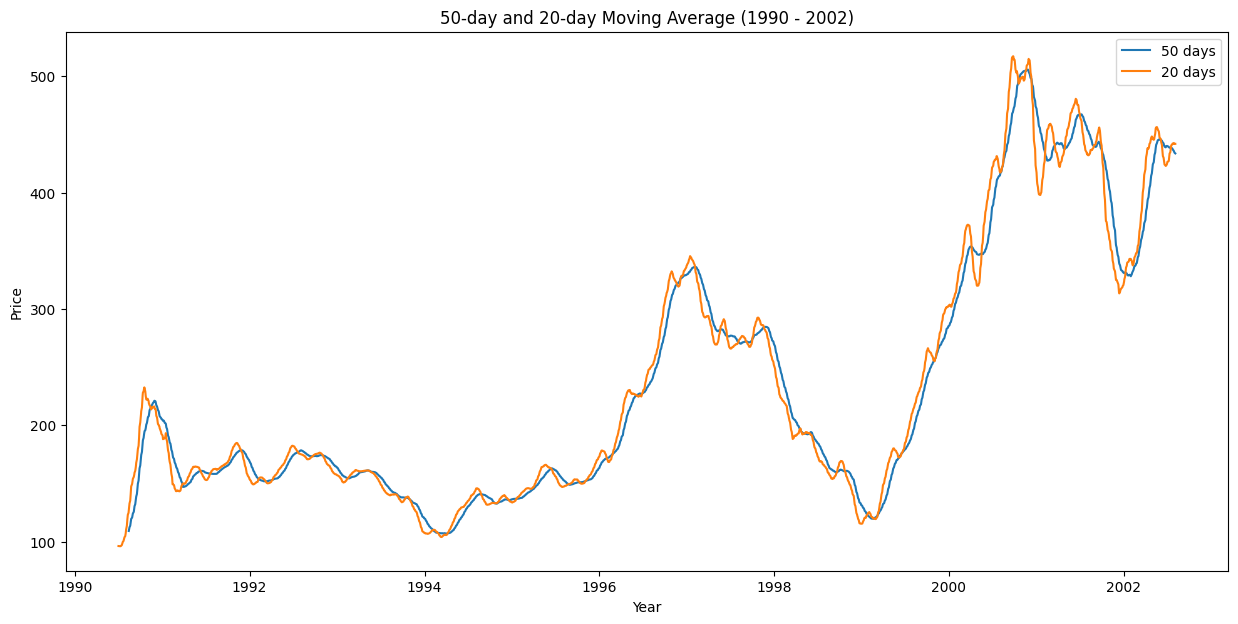

In [87]:
n = 3000
plt.figure(figsize=(15, 7))
plt.plot(df.index[0:n], df['Long MA'][0:n], label='50 days')
plt.plot(df.index[0:n], df['Short MA'][0:n], label='20 days')
plt.title('50-day and 20-day Moving Average (1990 - 2002)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

In [10]:
df2 = df

In [11]:
df2['Prev_Short_MA'] = df2['Short MA'].shift(1)
df2['Prev_Long_MA'] = df2['Long MA'].shift(1)

df2['Signal'] = 0

# Generate signals:
# Signal 1 for when the Short MA crosses above the Long MA
df2['Signal'] = np.where((df2['Short MA'] > df2['Long MA']) & (df2['Prev_Short_MA'] <= df2['Prev_Long_MA']), 1, df2['Signal'])

# Signal -1 for when the Short MA crosses below the Long MA
df2['Signal'] = np.where((df2['Short MA'] < df2['Long MA']) & (df2['Prev_Short_MA'] >= df2['Prev_Long_MA']), -1, df2['Signal'])

# Note: The signal will remain 0 in all other cases
# Plotting


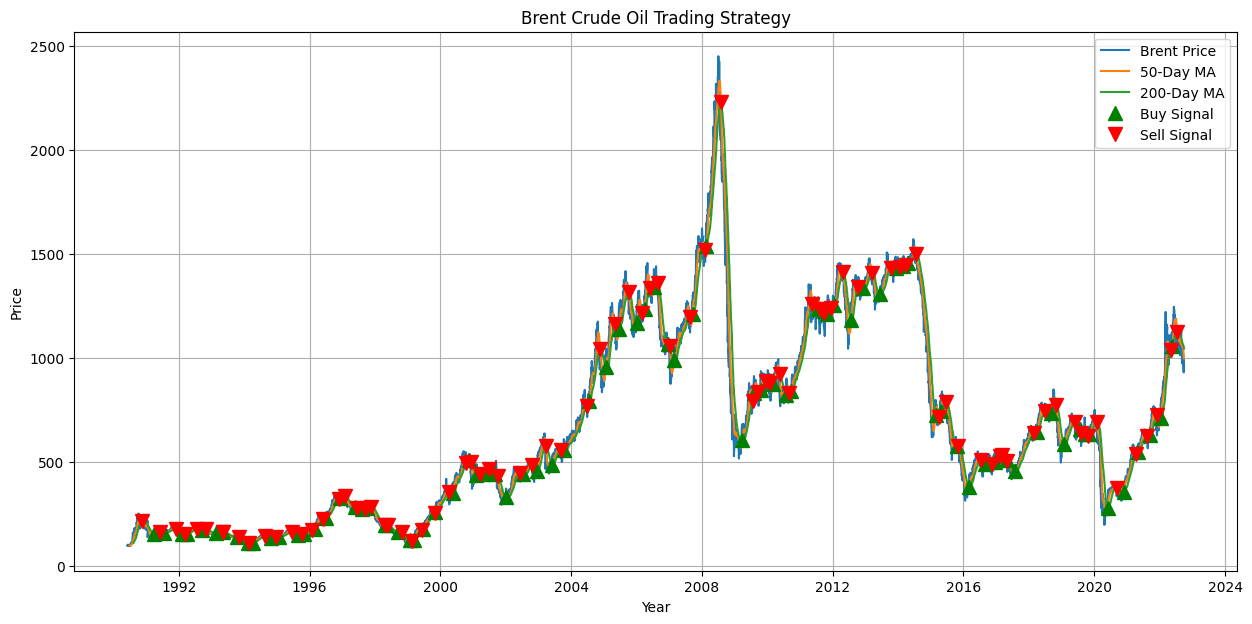

In [12]:
plt.figure(figsize=(15, 7))
plt.plot(df2.index, df2['Brent'], label='Brent Price')
plt.plot(df2.index, df2['Short MA'], label='50-Day MA')
plt.plot(df2.index, df2['Long MA'], label='200-Day MA')

# Highlight buy signals
plt.plot(df2[df2['Signal'] == 1].index, df2['Short MA'][df2['Signal'] == 1], '^', markersize=10, color='g', label='Buy Signal')

# Highlight sell signals
plt.plot(df2[df2['Signal'] == -1].index, df2['Short MA'][df2['Signal'] == -1], 'v', markersize=10, color='r', label='Sell Signal')

plt.title('Brent Crude Oil Trading Strategy')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [166]:
df2['Signal2'] = 0

# Generate signals:
# Signal 1 for when the Short MA crosses above the Long MA
df2['Signal2'] = np.where((df2['Short MA'] > df2['Long MA']),1, df2['Signal2'])

# Signal -1 for when the Short MA crosses below the Long MA
df2['Signal2'] = np.where((df2['Short MA'] < df2['Long MA']), -1, df2['Signal2'])

def RSI_strategy(n, m):
    benefits = 0
    number = 0
    k = 100
    B = []
    B2 = []
    J2 = []
    B3 = []
    J3 = []
    J = []
    ROI=0
    trade_number = 0
    bought = False
    for j, s in enumerate(df2['Signal'][n:m]):
        i = j+n
        if s!=0:
            if df2['Signal2'][i] ==1 and df['RSI'][i]>70:
                bought=True
                number+= k
                expense = k * df2['Brent'][i]
                benefits -= expense
                B2.append(df2['Brent'][i])
                J2.append(df.index[i])
            elif df2['Signal'][i] ==-1 and bought==True:
                bought=False
                trade_number+=1
                gains = number * df2['Brent'][i]
                benefits += gains
                ROI += (gains-expense)/expense
                number = 0
                B3.append(df2['Brent'][i])
                J3.append(df.index[i])
            
        B.append(benefits + number*df2['Brent'][i])
        J.append(df.index[i])
    return (B, J, B2, J2, B3, J3, benefits + number*df2['Brent'][i], ROI/trade_number)
            


0.038084519828715836


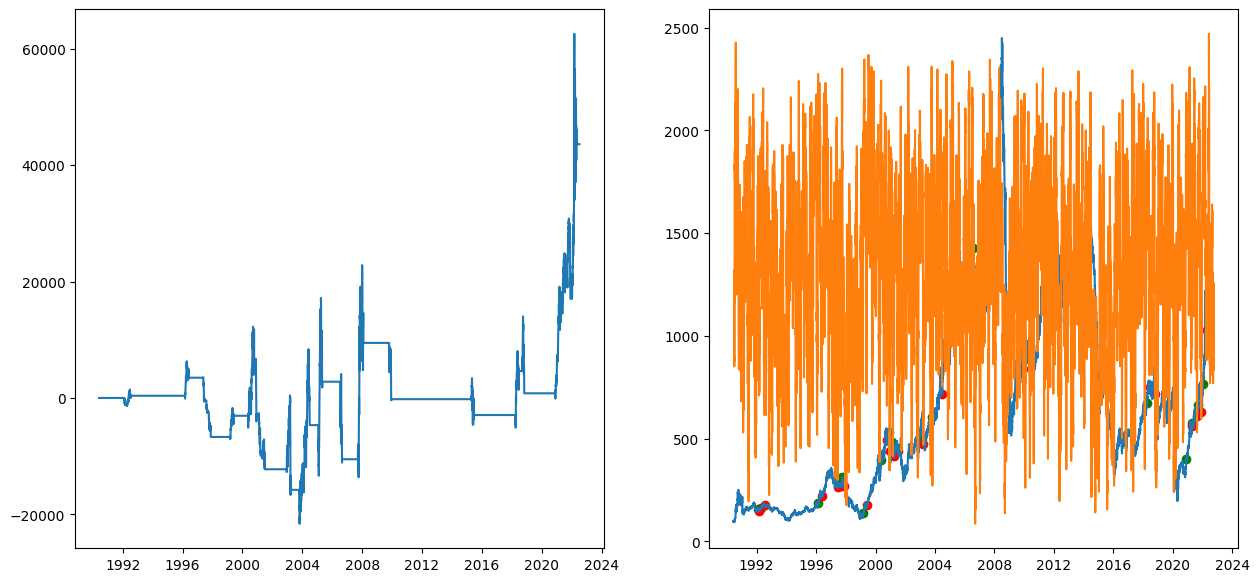

In [170]:
benefits_long, days_long, b2,j2,b3,j3, ben, roi = RSI_strategy(0, 8000)

plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plt.plot(days_long, benefits_long, label='Brent Price')
plt.subplot(1,2,2)
plt.plot(df2.index, df2['Brent'], label='Brent Price')
plt.plot(df.index, df['RSI']*25, label='Brent Price')
plt.scatter(j2, b2, c='g')
plt.scatter(j3, b3, c='r')


print(roi)

In [120]:
def long_strategy(n, m):
    benefits = 0
    number = 0
    k = 100
    B = []
    B2 = []
    J2 = []
    B3 = []
    J3 = []
    J = []
    ROI=0
    trade_number = 0
    bought = False
    for j, s in enumerate(df2['Signal'][n:m]):
        i = j+n
        if s!=0:
            if s==1 and df['RSI'][i]<40:
                bought=True
                number+= k
                expense = k * df2['Brent'][i]
                benefits -= expense
                B2.append(benefits + number*df2['Brent'][i])
                J2.append(df.index[i])
            elif s==-1 and bought==True:
                bought=False
                trade_number+=1
                gains = number * df2['Brent'][i]
                benefits += gains
                ROI += (gains-expense)/expense
                number = 0
                B3.append(benefits + number*df2['Brent'][i])
                J3.append(df.index[i])
            
        B.append(benefits + number*df2['Brent'][i])
        J.append(df.index[i])
    return (B, J, benefits + number*df2['Brent'][i], ROI/trade_number)
            


-0.016772585592747188


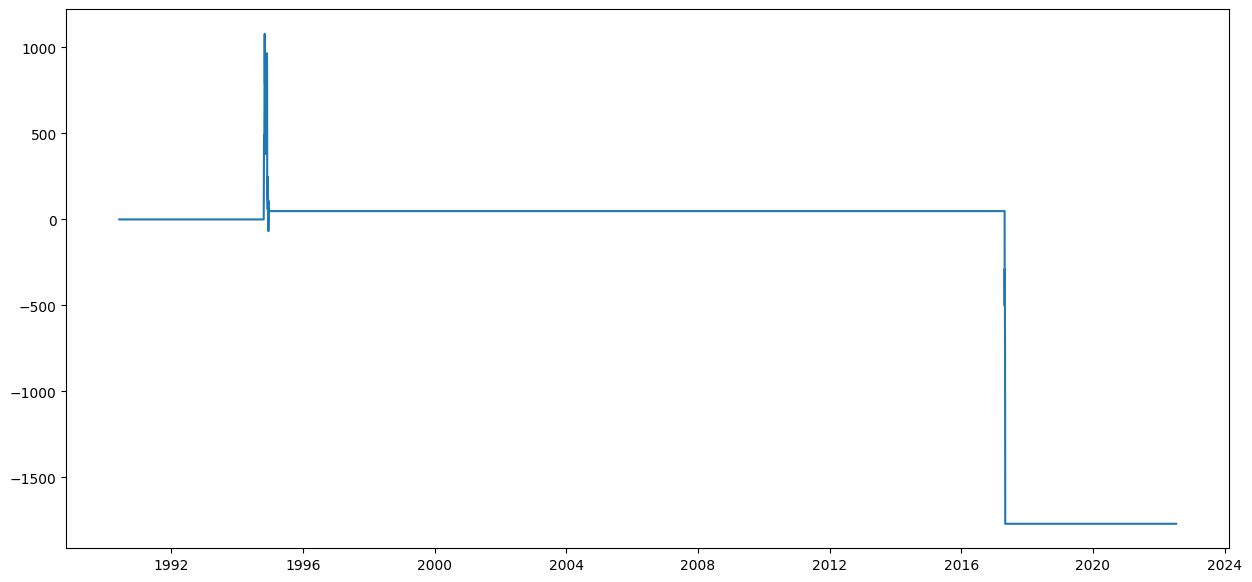

In [121]:
benefits_long, days_long, ben, roi = long_strategy(0, 8000)
plt.figure(figsize=(15, 7))
plt.plot(days_long, benefits_long)

print(roi)

-0.010051550522490299


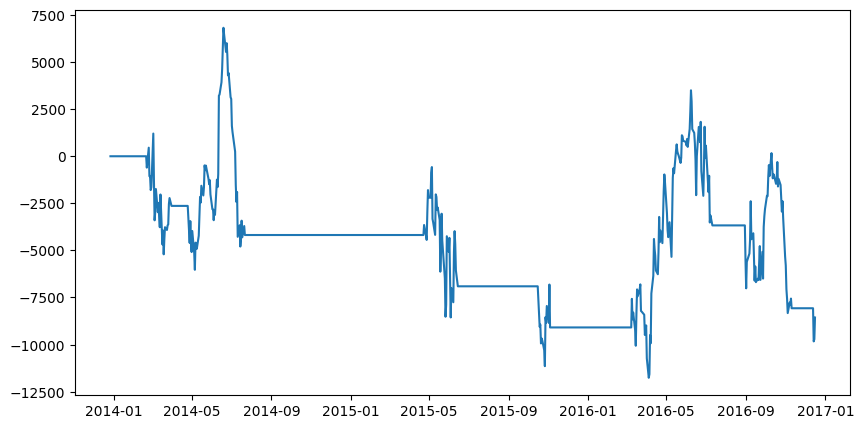

In [78]:
benefits_long_2014_2016, days_long_2014_2016, ben, roi = long_strategy(5850, 6600)
plt.figure(figsize=(10, 5))
plt.plot(days_long_2014_2016, benefits_long_2014_2016)

print(roi)

### Using volatility

We are going to make our strategy less risky, by using the volatility

In [16]:
df['Volatility'] = df['Brent'].rolling(window=50).std()

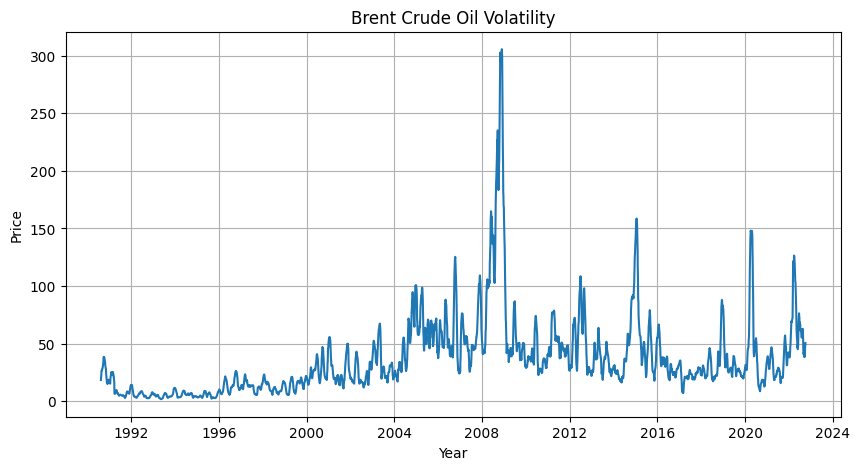

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Volatility'])

plt.title('Brent Crude Oil Volatility')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [18]:
def long_strategy2(n, m):
    benefits = 0
    number = 0
    B = []
    B2 = []
    J2 = []
    B3 = []
    J3 = []
    J = []
    bought = 0
    trade_number = 0
    ROI = 0
    expense=0
    for j, s in enumerate(df2['Signal'][n:m]):
        i=j+n
        if s!=0:
            if s==1:
                bought = 1
                k = 2000/df['Volatility'][i]
                number+= k
                expense = k * df2['Brent'][i]
                benefits -= expense
                B2.append(benefits + number*df2['Brent'][i])
                J2.append(df.index[i])
            elif s==-1 and bought==1:
                trade_number+=1
                gains = number * df2['Brent'][i]
                benefits += gains
                ROI += (gains - expense)/expense
                number = 0
                B3.append(benefits + number*df2['Brent'][i])
                J3.append(df.index[i])
            
        B.append(benefits + number*df2['Brent'][i])
        J.append(df.index[i])
    return (B, J, benefits + number*df2['Brent'][i], ROI/trade_number)
            
    

-0.018393864861901286


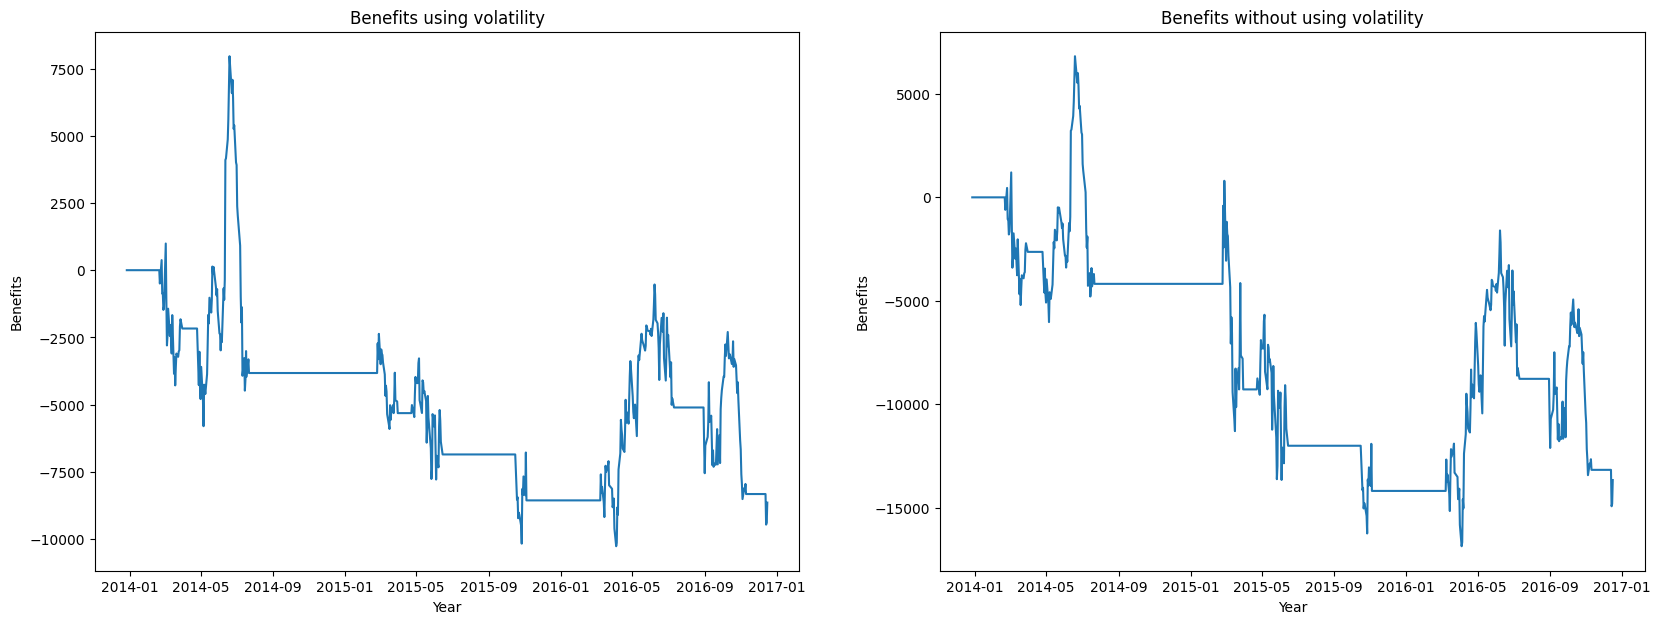

In [19]:
benefits_long2, days_long2, ben, roi = long_strategy2(5850, 6600)
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(days_long2, benefits_long2)
plt.title('Benefits using volatility')
plt.xlabel('Year')
plt.ylabel('Benefits')
plt.subplot(1,2,2)
plt.title('Benefits without using volatility')
plt.xlabel('Year')
plt.ylabel('Benefits')
plt.plot(days_long_2014_2016, benefits_long_2014_2016)

print(roi)

We observe that when the prices are decreasing, using the volatility to reduce risks allows us to minimize potential losses.

## B) Short trading strategy

In [22]:
def short_strategy(n, m):
    benefits = 0
    number = 0
    k = 100
    B = []
    B2 = []
    J2 = []
    B3 = []
    J3 = []
    J = []
    ROI=0
    trade_number = 0
    sold = False
    for j, s in enumerate(df2['Signal'][n:m]):
        i = j+n
        if s!=0:
            if s==1 and sold==True:
                number+= k
                expense = k * df2['Brent'][i]
                benefits -= expense
                ROI += (gains-expense)/expense
                trade_number+=1
            elif s==-1:
                sold=True
                gains = k * df2['Brent'][i]
                benefits += gains
                number -=k
            
        B.append(benefits + number*df2['Brent'][i])
        J.append(df.index[i])
    return (np.array(B), np.array(J), benefits + number*df2['Brent'][i], ROI/trade_number)
            
    

0.03404584954288441


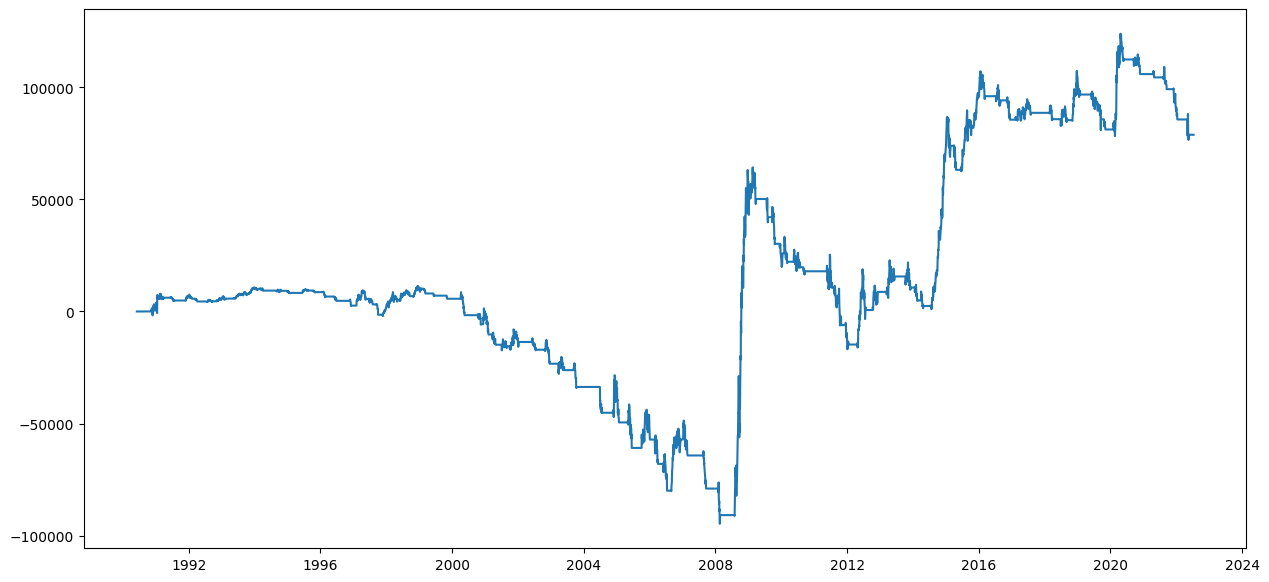

In [23]:
benefits_short, days_short, ben, roi = short_strategy(0, 8000)
plt.figure(figsize=(15, 7))
plt.plot(days_short, benefits_short)
print(roi)

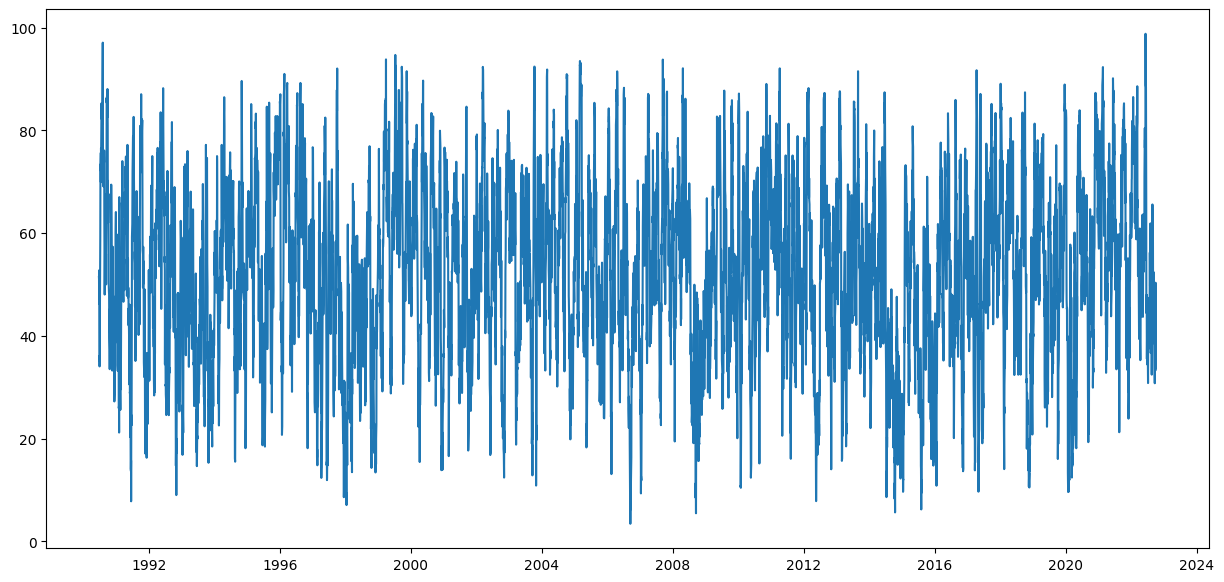

In [34]:
# Calculate price changes
df['change'] = df['Brent'].diff()

# Separate gains and losses
gain = df['change'].mask(df['change'] < 0, 0)
loss = -df['change'].mask(df['change'] > 0, 0)

# Specify the look-back period for RSI
look_back_period = 14

# Calculate average gain and loss
avg_gain = gain.rolling(window=look_back_period, min_periods=look_back_period).mean()
avg_loss = loss.rolling(window=look_back_period, min_periods=look_back_period).mean()

# Calculate the relative strength (RS)
rs = avg_gain / avg_loss

# Calculate the RSI
rsi = 100 - (100 / (1 + rs))

# Display the RSI
df['RSI'] = rsi


plt.figure(figsize=(15, 7))
plt.plot(df.index, df['RSI'])

In [60]:
def short_strategy(n, m):
    benefits = 0
    number = 0
    k = 100
    B = []
    B2 = []
    J2 = []
    B3 = []
    J3 = []
    J = []
    ROI=0
    trade_number = 0
    sold = False
    for j, s in enumerate(df2['Signal'][n:m]):
        i = j+n
        if s!=0:
            if s==1 and sold==True:
                sold = False
                number+= k
                expense = k * df2['Brent'][i]
                benefits -= expense
                ROI += (gains-expense)/expense
                trade_number+=1
            elif s==-1 and df['RSI'][i]<30:
                sold=True
                gains = k * df2['Brent'][i]
                benefits += gains
                number -=k
            
        B.append(benefits + number*df2['Brent'][i])
        J.append(df.index[i])
    return (np.array(B), np.array(J), benefits + number*df2['Brent'][i], ROI/trade_number)
            
    

215034.95970353857


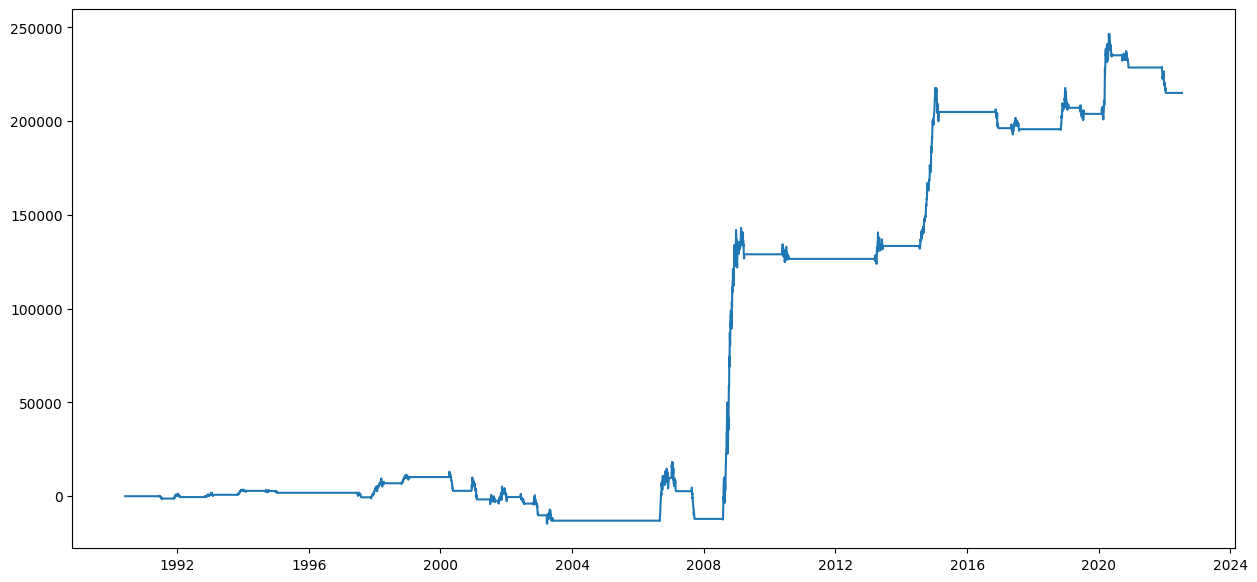

In [61]:
benefits_short, days_short, ben, roi = short_strategy(0, 8000)
plt.figure(figsize=(15, 7))
plt.plot(days_short, benefits_short)
print(ben)

In this scenario, we employ a short trading strategy, which is based on the anticipation that the asset's price will decrease. However this approach does not perform optimally here since the price exhibit an overall increasing trend. Nevertheless, the 2008 financial crisis presents a unique situation. The moving average crossover strategy, used here, identifies a potential decline in prices. This anomaly, primarily due to the crisis, aids the effectiveness of the short trading strategy.

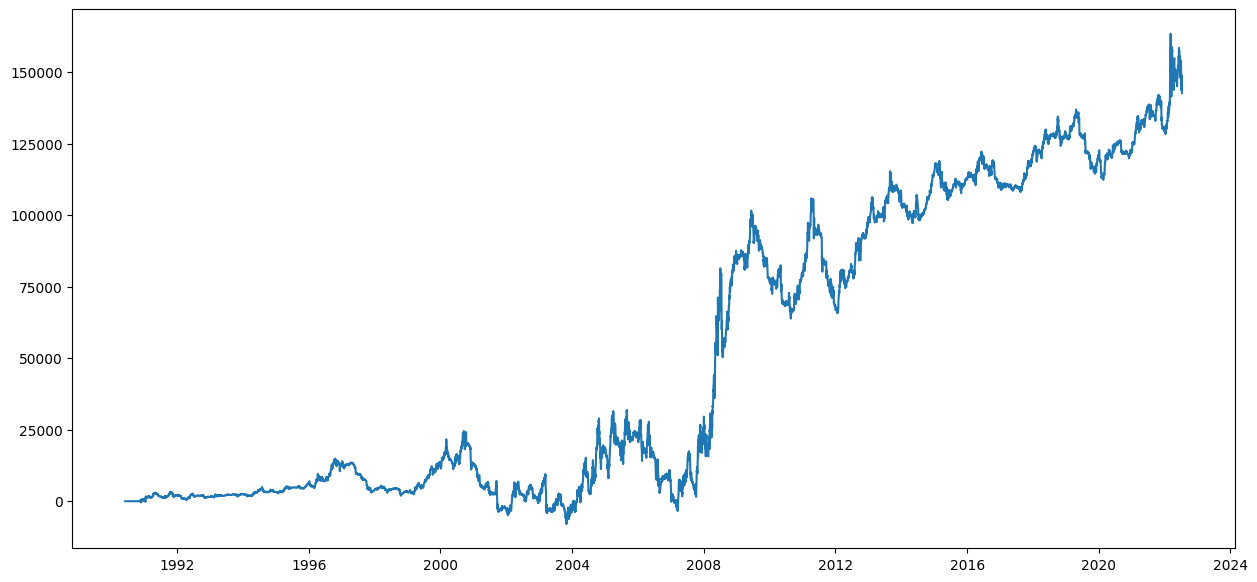

In [76]:
plt.figure(figsize=(15, 7))
plt.plot(days_short, (0.3*benefits_short+benefits_long)/1.3)

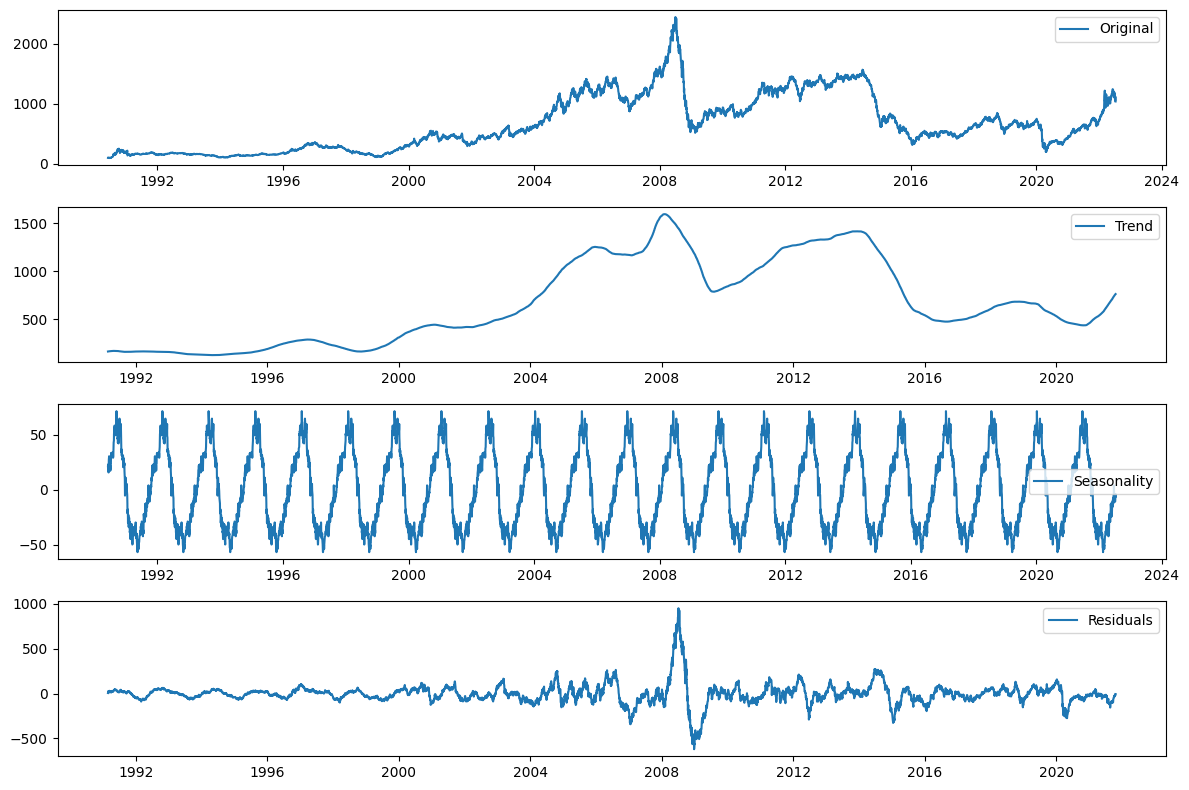

In [39]:
import statsmodels.api as sm
df3 = df[0:8000]

# Assuming 'data' is your DataFrame and it has a DateTime index and a 'Price' column
decomposition = sm.tsa.seasonal_decompose(df3['Brent'], model='additive', period=365)  # 'period' depends on the data frequency

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df3['Brent'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

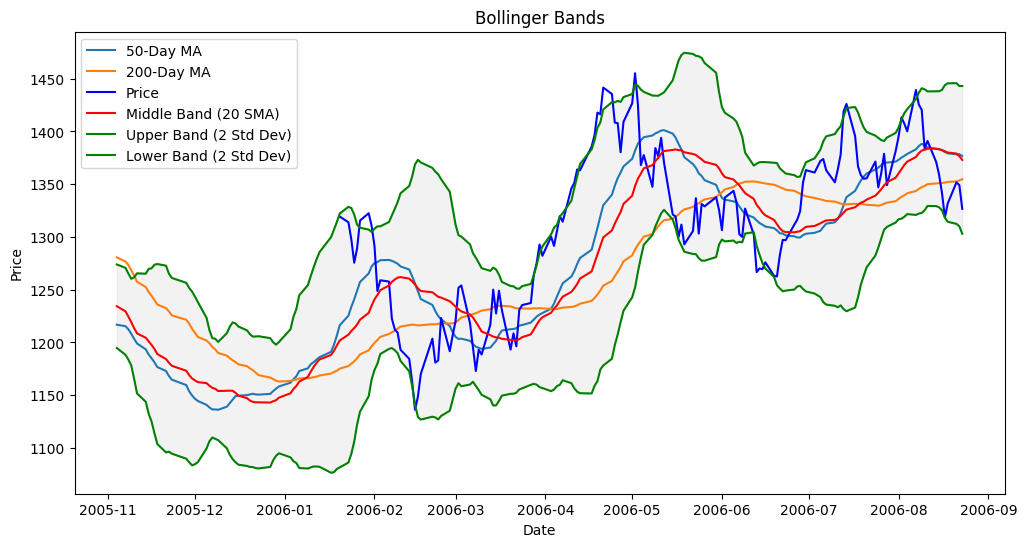

In [67]:
n= 3800
m=4000
df['Middle Band'] = df['Brent'].rolling(window=28).mean()
df['Upper Band'] = df['Middle Band'] + (2 * df['Brent'].rolling(window=20).std())
df['Lower Band'] = df['Middle Band'] - (2 * df['Brent'].rolling(window=20).std())



plt.figure(figsize=(12,6))
plt.plot(df2.index[n:m], df2['Short MA'][n:m], label='50-Day MA')
plt.plot(df2.index[n:m], df2['Long MA'][n:m], label='200-Day MA')

plt.plot(df['Brent'][n+50:m], label='Price', color='blue')
plt.plot(df['Middle Band'][n:m], label='Middle Band (20 SMA)', color='red')
plt.plot(df['Upper Band'][n:m], label='Upper Band (2 Std Dev)', color='green')
plt.plot(df['Lower Band'][n:m], label='Lower Band (2 Std Dev)', color='green')
plt.fill_between(df.index[n:m], df['Upper Band'][n:m], df['Lower Band'][n:m], color='grey', alpha=0.1)
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()